# MINOR PROJECT
## Predicting Boston House Prices 

## INTRODUCTION
In this project, there will be evaluated the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

## DATA DESCRIPTION
The Boston Housing Dataset
The Boston Housing Dataset is a derived from information collected by the U.S.
Census Service concerning housing in the area of Boston MA. 
# Every Coloumn :
                                 CRIM - per capita crime rate by town
                                 ZN - proportion of residential land zoned for lots over 25,000 sq. ft.
                                 INDUS - proportion of non-retail business acres per town.
                                 CHAS - Charles River dummy variable (1 if tract bounds river; 0otherwise)
                                 NOX - nitric oxides concentration (parts per 10 million)
                                 RM - average number of rooms per dwelling
                                 AGE - proportion of owner-occupied units built prior to 1940
                                 DIS - weighted distances to five Boston employment centers
                                 RAD - index of accessibility to radial highways
                                 TAX - full-value property-tax rate per $10,000
                                 PTRATIO - pupil-teacher ratio by town
                                 B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                                 LSTAT - % lower status of the population
                                 MEDV - Median value of owner-occupied homes

In [1]:
## Libraries Import

import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
##Loading Data and Removing Warnings message

import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston

ldata = load_boston()
# Create DataFrame
df_ldata = pd.DataFrame(data=ldata.data, columns=ldata.feature_names)
df_ldata['MEDV'] = ldata.target
df_ldata

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
df_ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# For the purpose of the project the dataset has been preprocessed 

The essential features for the project are: **‘RM’, ‘LSTAT’, ‘PTRATIO’ and ‘MEDV’.** The remaining features have been excluded.

In [11]:
# VisualPython [1]
data = df_ldata.drop(['CHAS', 'CRIM', 'ZN', 'INDUS' , 'NOX' , 'AGE' , 'DIS' , 'RAD' , 'TAX' , 'B'], axis=1)
data

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       506 non-null    float64
 1   PTRATIO  506 non-null    float64
 2   LSTAT    506 non-null    float64
 3   MEDV     506 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


In [15]:

data
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
data.describe()

Boston housing dataset has 506 data points with 4 variables each.


,RM,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000
mean,6.284634,18.455534,12.653063,22.532806
std,0.702617,2.164946,7.141062,9.197104
min,3.561000,12.600000,1.730000,5.000000
25%,5.885500,17.400000,6.950000,17.025000
50%,6.208500,19.050000,11.360000,21.200000
75%,6.623500,20.200000,16.955000,25.000000
max,8.780000,22.000000,37.970000,50.000000


# Approach
My approach to the solution of this project is first doing the visualization of the
data evaluation matrices. It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, I will be calculating the **[*coefficient of determination*]**, R<sup>2</sup>, to quantify the model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

# VISUALIZATION CODE

In [60]:
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split

def ModelLearning(X, y):
   
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
    cv.get_n_splits(X)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
    cv.get_n_splits(X)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()


def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

In [61]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


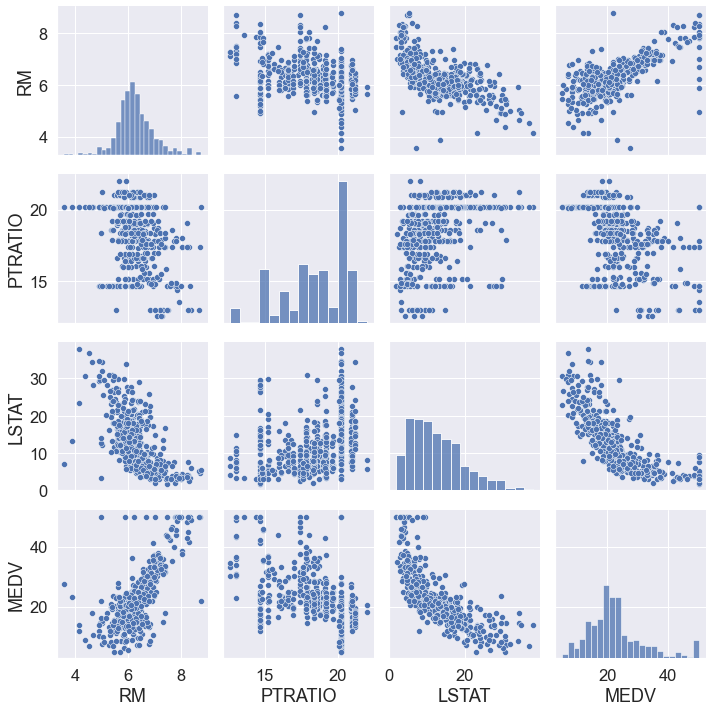

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(data, height=2.5)
plt.tight_layout()

# Observation
We can spot a linear relationship between ‘RM’ and House prices ‘MEDV’. In addition, we can infer from the histogram that the ‘MEDV’ variable seems to be normally distributed but contain several outliers.

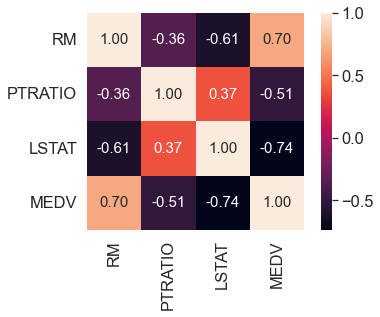

In [63]:
corr = data.corr()
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels = corr,
                xticklabels = corr)

# Observation
To fit a regression model, the features of interest are the ones with a high correlation with the target variable ‘MEDV’. From the previous correlation matrix, we can see that this condition is achieved for our selected variables.

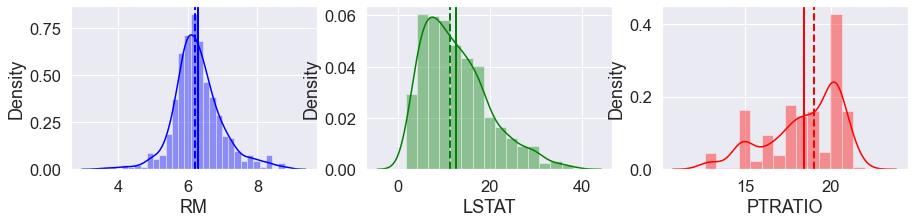

In [64]:
##Mean and Meridian check

clr = ['blue', 'green', 'red']

fig, axs = plt.subplots(ncols=3,figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.subplot(131 + i)
    sns.distplot(data[var],  color = clr[i])
    plt.axvline(data[var].mean(), color=clr[i], linestyle='solid', linewidth=2)
    plt.axvline(data[var].median(), color=clr[i], linestyle='dashed', linewidth=2)

# Observation
According to histograms, RM represents simmetric distribution with mean and median next to each other. LSTAT is positively skewed, has a peak around 5. PTRATIO looks like negatively skewed distribution with the peak around ~0.23.

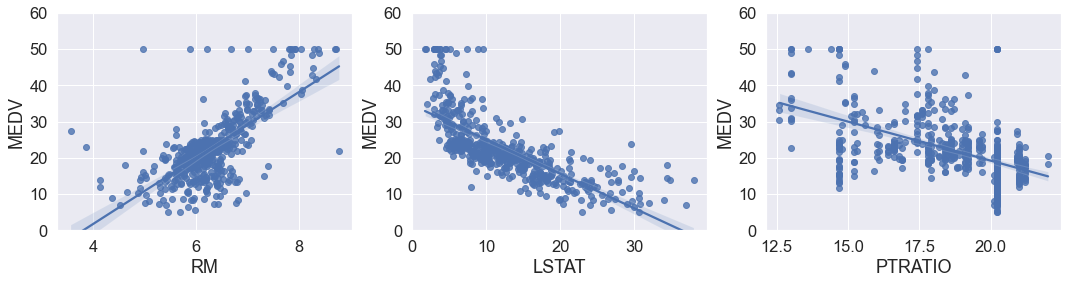

In [73]:


fig, axs = plt.subplots(ncols=3, figsize=(18,4))

for i in range(len(axs)):
    axs[i].set_ylim([0, 60])
# RM vs Price
_ = sns.regplot(x=features['RM'],  y=prices, ax=axs[0])
# LSSAT vs Price
_ = sns.regplot(x=features['LSTAT'],  y=prices, ax=axs[1])
# PTRATIO vs Price
_ = sns.regplot(x=features['PTRATIO'] ,  y=prices, ax=axs[2])

plt.show()

In [74]:
def performance_metric(y_true, y_predict):
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    return score

In [75]:
##Calculate Performance
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [76]:
#Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

print("Training and testing split was successful.")

Training and testing split was successful.


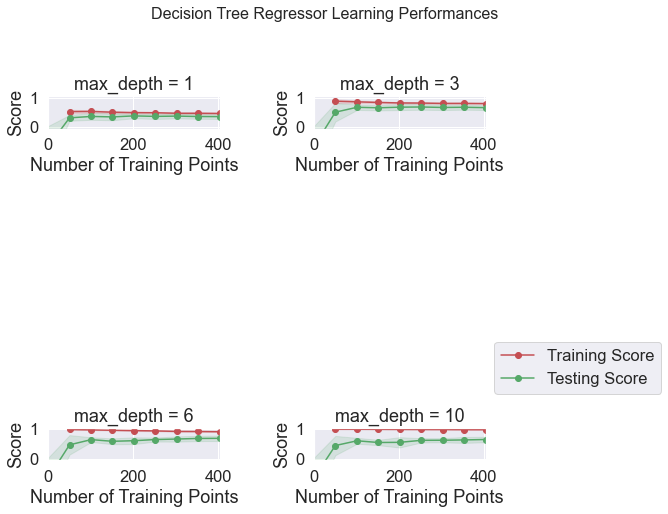

In [77]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

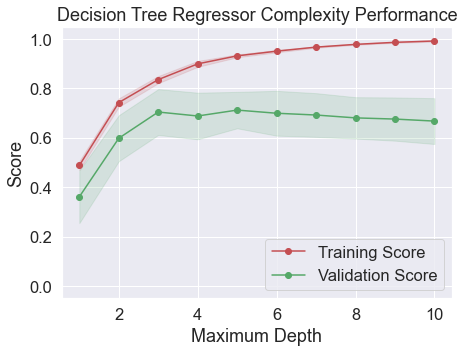

In [78]:
ModelComplexity(X_train, y_train)

In [79]:
param_grid = [ {'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}, ]

In [83]:
def fit_model(X, y):
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_
    return grid


In [89]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


In [98]:
# Produce a matrix for client data
client_data = [[3, 11, 15], # Client 1
               [4, 23, 28], # Client 2
               [5, 1, 22]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $20.93
Predicted selling price for Client 2's home: $13.53
Predicted selling price for Client 3's home: $16.20


In [99]:
PredictTrials(features, prices, fit_model, client_data)


Trial 1: $20.93
Trial 2: $30.85
Trial 3: $21.55
Trial 4: $20.64
Trial 5: $14.99
Trial 6: $16.07
Trial 7: $20.02
Trial 8: $15.48
Trial 9: $19.60
Trial 10: $18.71

Range in prices: $15.86


In [100]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [101]:
lm.intercept_


24.031093429371214

In [102]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,RM,4.264947
1,PTRATIO,-1.136547
2,LSTAT,-0.575521


In [103]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [104]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.721859247739624
Adjusted R^2: 0.7197731920976711
MAE: 3.481884708346332
MSE: 23.681938393213375
RMSE: 4.866409188838663


# Result and Discussion 
The Model has sucessfully completed his parameters and predicted the housing price througr MEDV and the Model Evaluation gives us the remainig check of Goal and error scores 

# Conclusion
After doing the module regression judging by the dataset thiss type of prices would not be sufficient for today's time period it will be more aplicable 30-40 years back time period